<a href="https://colab.research.google.com/github/unafrani/portafolio-datos/blob/main/El_costo_de_tener_cuerpo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# El costo de tener cuerpo: Menstruación y desigualdad económica en Chile

## Introducción
Menstruar en Chile tiene un costo económico que no siempre es visible, pero afecta mes a mes a millones de personas. Este análisis busca cuantificar el impacto del gasto en productos de gestión menstrual (como toallas higiénicas, copas y medicamentos) según el nivel de ingresos, utilizando datos reales de fuentes oficiales como SERNAC y CASEN 2022.

A través de este estudio, se evidencian desigualdades estructurales que transforman un proceso biológico natural en una carga económica desigual, especialmente para quienes viven en condiciones de mayor vulnerabilidad económica.

## Objetivo
Estimar qué porcentaje del ingreso mensual de las mujeres se destina a productos menstruales, comparando distintos quintiles de ingreso y tipos de producto.

## Fuentes:
- Ingreso per cápita mensual: Encuesta CASEN 2022
- Costos anuales de productos: Informe SERNAC/DEI (octubre 2024)

---


In [5]:
import pandas as pd

# Leer el archivo CSV (ajustá el nombre si es distinto)
df = pd.read_excel("/content/datos_menstruacion_actualizados.xlsx")

# Calcular el costo mensual
df["Costo_Mensual_CLP"] = df["Costo_Anual_CLP"] / 12

# Calcular el porcentaje del ingreso mensual destinado a menstruación
df["%_Ingreso"] = (df["Costo_Mensual_CLP"] / df["Ingreso_Mensual_CLP"]) * 100

# Calcular gasto acumulado en 10 y 30 años
df["Gasto_10_anios"] = df["Costo_Anual_CLP"] * 10
df["Gasto_30_anios"] = df["Costo_Anual_CLP"] * 30

# Mostrar las primeras filas
df.head()


,Quintil,Ingreso_Mensual_CLP,Producto,Costo_Anual_CLP,Costo_Mensual_CLP,%_Ingreso,Gasto_10_anios,Gasto_30_anios
0,Q1,237347,Toallas Higiénicas Desechables,29160,2430.0,1.023817,291600,874800
1,Q2,610697,Toallas Higiénicas Desechables,29160,2430.0,0.397906,291600,874800
2,Q3,942933,Toallas Higiénicas Desechables,29160,2430.0,0.257707,291600,874800
3,Q4,1317694,Toallas Higiénicas Desechables,29160,2430.0,0.184413,291600,874800
4,Q5,3078771,Toallas Higiénicas Desechables,29160,2430.0,0.078928,291600,874800


In [6]:
# Cálculo de costo mensual
df["Costo_Mensual_CLP"] = df["Costo_Anual_CLP"] / 12

# Porcentaje del ingreso mensual que se va en menstruación
df["%_Ingreso"] = (df["Costo_Mensual_CLP"] / df["Ingreso_Mensual_CLP"]) * 100

# Gasto acumulado en 10 y 30 años
df["Gasto_10_anios"] = df["Costo_Anual_CLP"] * 10
df["Gasto_30_anios"] = df["Costo_Anual_CLP"] * 30

# Verificamos
df.head()


,Quintil,Ingreso_Mensual_CLP,Producto,Costo_Anual_CLP,Costo_Mensual_CLP,%_Ingreso,Gasto_10_anios,Gasto_30_anios
0,Q1,237347,Toallas Higiénicas Desechables,29160,2430.0,1.023817,291600,874800
1,Q2,610697,Toallas Higiénicas Desechables,29160,2430.0,0.397906,291600,874800
2,Q3,942933,Toallas Higiénicas Desechables,29160,2430.0,0.257707,291600,874800
3,Q4,1317694,Toallas Higiénicas Desechables,29160,2430.0,0.184413,291600,874800
4,Q5,3078771,Toallas Higiénicas Desechables,29160,2430.0,0.078928,291600,874800


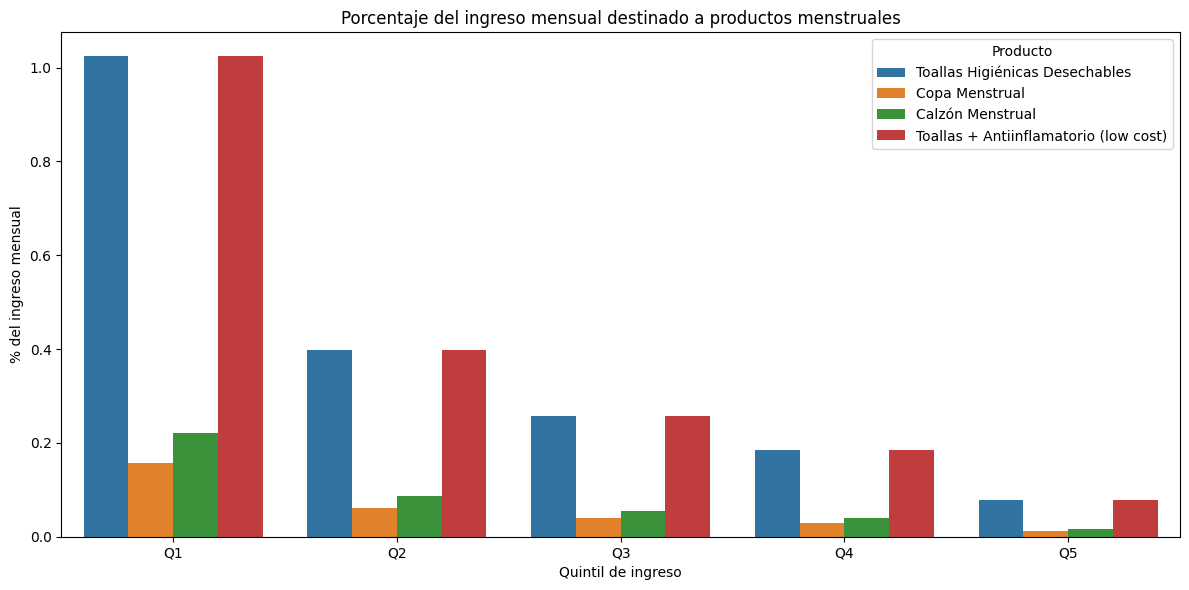

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Quintil", y="%_Ingreso", hue="Producto")
plt.title("Porcentaje del ingreso mensual destinado a productos menstruales")
plt.ylabel("% del ingreso mensual")
plt.xlabel("Quintil de ingreso")
plt.legend(title="Producto")
plt.tight_layout()
plt.show()


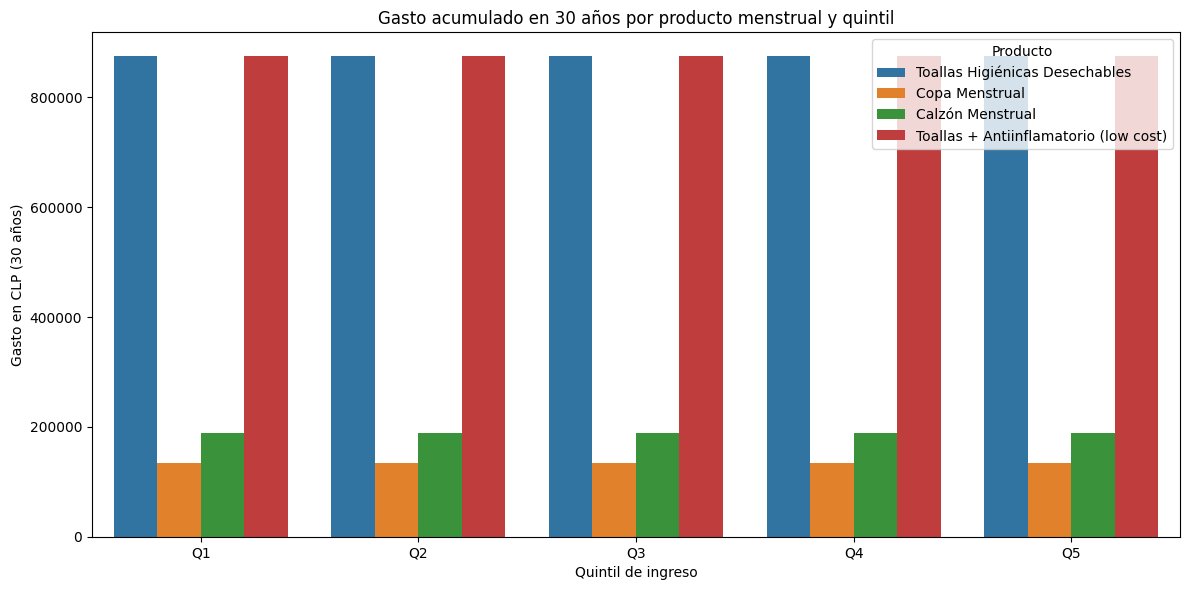

In [8]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Quintil", y="Gasto_30_anios", hue="Producto")
plt.title("Gasto acumulado en 30 años por producto menstrual y quintil")
plt.ylabel("Gasto en CLP (30 años)")
plt.xlabel("Quintil de ingreso")
plt.legend(title="Producto")
plt.tight_layout()
plt.show()


# Interpretación de resultados

## ¿Por qué estos gráficos?

Los gráficos presentados buscan responder una pregunta central:  
**¿Cómo impacta económicamente la menstruación según el nivel socioeconómico?**

- El primer gráfico muestra el **porcentaje del ingreso mensual** que una persona debe destinar solo para productos menstruales.
- Se observa que las personas en el **quintil 1** (menores ingresos) destinan una proporción mucho mayor de su ingreso.
- El **gasto acumulado en 30 años** muestra cómo, incluso usando productos reutilizables, se llega a gastar cientos de miles de pesos chilenos solo por menstruar.

---

## Reflexión crítica

Este estudio muestra que menstruar **no solo es una experiencia biológica, sino también económica**, y que está marcada por la desigualdad.  
Las personas con menos recursos enfrentan un gasto que representa una porción significativa de su ingreso, en un tema que rara vez se incluye en presupuestos familiares o políticas públicas.

> **Menstruar empobrece más a las personas que ya viven en contextos de precariedad.**

---

## Limitaciones

- El ingreso por quintil es un promedio: no representa la variabilidad interna.
- No se considera inflación futura ni diversidad de género (p. ej., hombres trans).
- Se asume uso constante y exclusivo de un producto.

Aun así, este análisis permite **cuantificar un fenómeno invisible que impacta el bienestar y la equidad económica en Chile.**


**Elaborado por:** [María Francisca González M.]  
**Herramientas usadas:** Python (pandas, matplotlib, seaborn), Google Colab  
**Fuentes:** CASEN 2022, SERNAC/DEI 2024  
**Portafolio:** [link al tuyo si querés agregar]
